In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1) # fetch the dataset
X, y = mnist.data, mnist.target.astype(np.uint8)

print(f"Dataset Shape: {X.shape}")  
print(f"Labels Shape: {y.shape}")  
print(f'Labels: {", ".join(str(i) for i in sorted(y.unique()))}')

Dataset Shape: (70000, 784)
Labels Shape: (70000,)
Labels: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


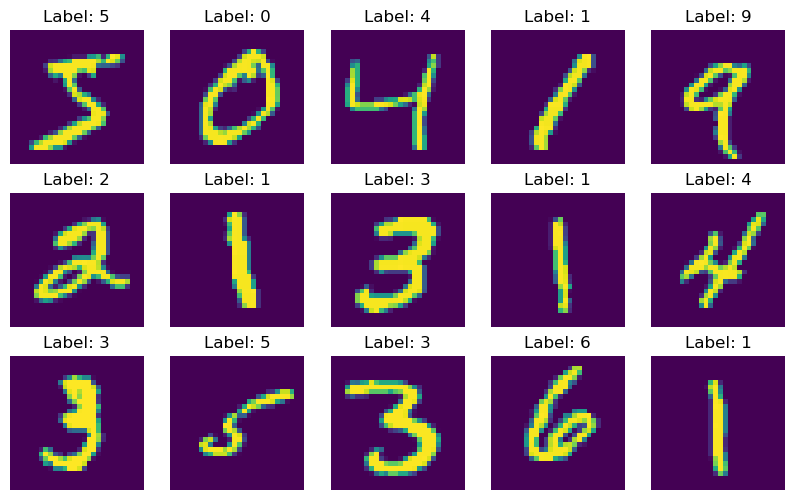

In [51]:
# examples of handwritten images 

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28, 28), cmap='viridis')
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.show()

In [53]:
print(f"Missing values: {X.isnull().sum().sum()}")  

Missing values: 0


/var/folders/bp/hcxzvqx903z9dhp_nkm85d080000gn/T/ipykernel_54980/2087185626.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="magma")


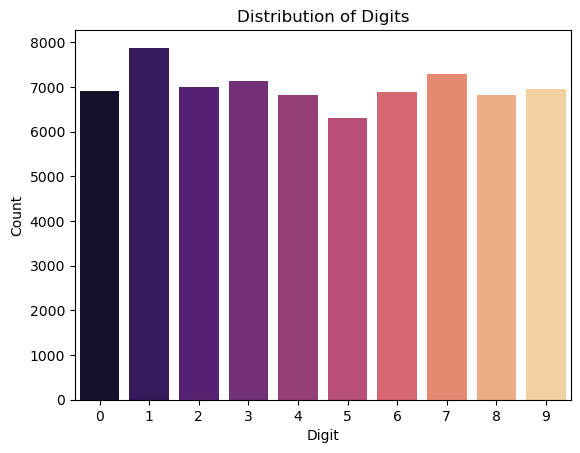

In [40]:
# distribution of digits to ensure balanced dataset; pretty balanced

sns.countplot(x=y, palette="magma")
plt.title("Distribution of Digits")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

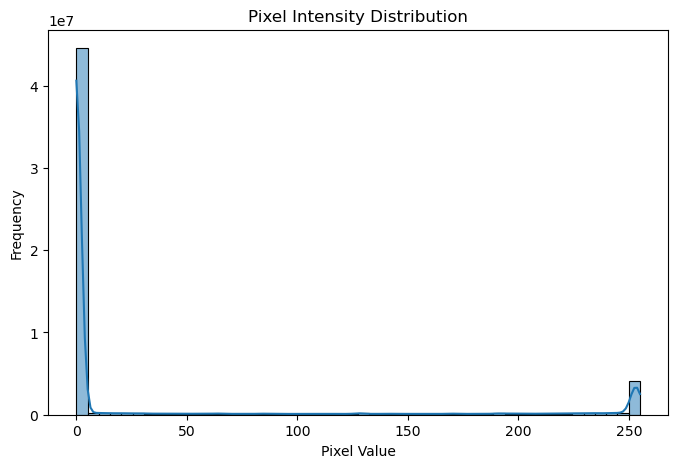

In [55]:
# distribution of pixel value over all images

plt.figure(figsize=(8, 5))
sns.histplot(X.values.flatten(), bins=50, kde=True)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

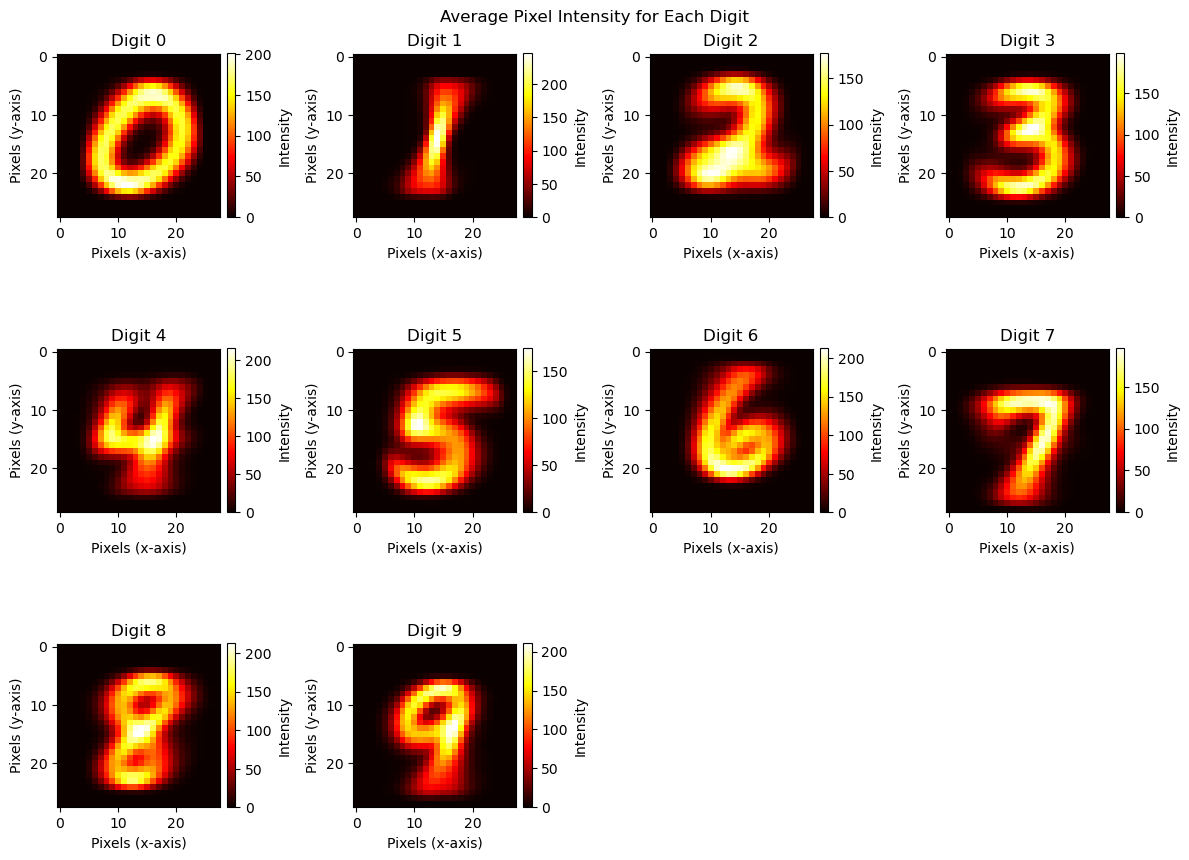

In [59]:
# average pixel intensity for each digit achieved by averaging pixel intensity over each digit

fig, axs = plt.subplots(3, 4, figsize=(12, 9))

for i in range(10):
    avg_digit = X[y == i].mean(axis=0).values.reshape(28, 28)  # mean intensity
    ax = axs[i // 4, i % 4]  
    im = ax.imshow(avg_digit, cmap="hot")  
    ax.set_title(f"Digit {i}")  
    ax.set_xlabel("Pixels (x-axis)")
    ax.set_ylabel("Pixels (y-axis)")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Intensity")

for j in range(10, 12):
    fig.delaxes(axs[j // 4, j % 4])

plt.tight_layout()
plt.suptitle('Average Pixel Intensity for Each Digit')
plt.show()
